

# Project: Investigate a US Gun Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **The data comes from the FBI's National Instant Criminal Background Check System (NICS). The NICS is used by to determine  whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase.**


### Question(s) for Analysis
>**1. What are the Top 10 states with average number of prepawn handgun in the US?**

>**2. Which states have had the highest growth in guns permits?**

>**3. What is the overall trend of private sales of handgun?**

>**4. What is the relationship between permit and prepawn_handgun in the US**

In [1]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

In [2]:
#import necessary library file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#pd.read_csv('gun_data')
chi=pd.read_csv('gun_data.csv')
chi.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#describe the numeric information of the data
chi.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [5]:
#find the missing value in data set
#null and na applicable
chi.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [6]:
#no of unique value in each column
chi.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [7]:
#check for data information
chi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
month                        12485 non-null object
state                        12485 non-null object
permit                       12461 non-null float64
permit_recheck               1100 non-null float64
handgun                      12465 non-null float64
long_gun                     12466 non-null float64
other                        5500 non-null float64
multiple                     12485 non-null int64
admin                        12462 non-null float64
prepawn_handgun              10542 non-null float64
prepawn_long_gun             10540 non-null float64
prepawn_other                5115 non-null float64
redemption_handgun           10545 non-null float64
redemption_long_gun          10544 non-null float64
redemption_other             5115 non-null float64
returned_handgun             2200 non-null float64
returned_long_gun            2145 non-null float64
returned_other   

### Data Messiness and Tidiness Issues
  1. Remove unwanted columns that are not needed for the analysis
  2. Remove all missing values from this gun dataset
  3. Carve a year out from the month column


### Data Cleaning


 ##### Issue 1: Create a subset of the dataframe to remove unwanted columns

##### Code

In [8]:
#Create a list of columns to be included in the new subset of the dataset
TheColumns=['month','state', 'permit','prepawn_handgun','private_sale_handgun']

In [9]:
chi=chi[TheColumns]

###### Test

In [10]:
#Show the 5 observation in new chi dataset
chi.head()

,month,state,permit,prepawn_handgun,private_sale_handgun
0,2017-09,Alabama,16717.0,15.0,9.0
1,2017-09,Alaska,209.0,5.0,17.0
2,2017-09,Arizona,5069.0,13.0,38.0
3,2017-09,Arkansas,2935.0,12.0,13.0
4,2017-09,California,57839.0,0.0,0.0


##### Issues 2: Remove all the missing values in the chi babe dataset

##### Code

In [11]:
#drop all the missing values in the chi dataset
chi.dropna(axis=0, inplace=True)

##### Test

In [12]:
#check for the missing values again in the dataset
chi.isnull().sum()

month                   0
state                   0
permit                  0
prepawn_handgun         0
private_sale_handgun    0
dtype: int64

> **After all the missing values in the dataset, we now have 2750 observations and the four (4) columns remains**

##### Issue 3: Make a year column and to be derived from month column in the chi dataset

##### Code:

In [13]:
#Extract year from the month column and make it a seperate column in the dataset
chi['year'] = pd.DatetimeIndex(chi['month']).year

###### Test

In [14]:
#Display new dataset information
chi.head()

,month,state,permit,prepawn_handgun,private_sale_handgun,year
0,2017-09,Alabama,16717.0,15.0,9.0,2017
1,2017-09,Alaska,209.0,5.0,17.0,2017
2,2017-09,Arizona,5069.0,13.0,38.0,2017
3,2017-09,Arkansas,2935.0,12.0,13.0,2017
4,2017-09,California,57839.0,0.0,0.0,2017


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 What are the Top 10 states with average number of prepawn handgun in the US?

In [15]:
#Create a grouping and aggregate function for high-level summary
def chi_grp(x,y,z,n):
    """Note that x is the factor we want to group, y is the factor we want to aggregate by
    z is the dataset we are using for the operation/function and n is the number of top/least"""
    chichi=z.groupby(x)[y].mean().sort_values(ascending=False).head(n)
    
    return chichi

In [16]:
#Group state in chi dataset and aggregate by prepawn_handgun
chi1=chi_grp('state','prepawn_handgun', chi, 10)
#show the chi1 dataset
chi1

state
Texas             32.52
Mississippi       31.76
Florida           14.24
Georgia           12.18
Alabama            9.92
South Carolina     8.54
North Carolina     8.48
Oklahoma           8.44
Ohio               8.42
Missouri           7.78
Name: prepawn_handgun, dtype: float64

In [17]:
#plot the 10 states with prepawned gun in US
#chi1 = chi.groupby('state')['prepawn_handgun'].mean().sort_values(ascending=False).head(10)
#chi1

Text(0.5,1,'Top 10 States With Prepawn Handgun')

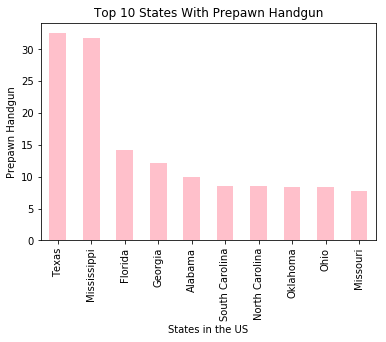

In [18]:
#Visualise the chi1 grouped dataset using Pandas bar plot
chi1.plot.bar(color="pink")
plt.xlabel('States in the US')
plt.ylabel('Prepawn Handgun')
plt.title('Top 10 States With Prepawn Handgun')

> **The Chart depicts the Top 10 states in the US with the highest prepawned hand gun. From the bar chart above, it is evident that Texas and Mississippi lead with highest average number of prepawn handgun while Ohio and Missouri bottow the bar char of those least two states with highest number of average prepawn handgun**

In [19]:
#chi = chi.rename(columns={'private_sale_handgun': 'private_sales_of_handgun', 'private_sale_long_gun': 'private_sales_of_long_gun', 'return_to_seller_handgun': 'returned_back_to_seller_handgun'})

### Research Question 2  Which 5 states have had the highest growth in gun registrations?

In [20]:
##Group state in chi dataset with respect to mean aggregate of permit
chi2 = chi_grp('state','permit', chi, 5)

Text(0.5,1,'Top 5 States with Gun Permits')

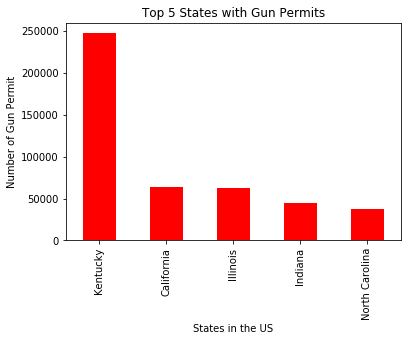

In [21]:
chi2.plot.bar(color="red")
plt.xlabel('States in the US')
plt.ylabel('Number of Gun Permit')
plt.title('Top 5 States with Gun Permits')

>  **The graph above shows the top 5 states with gun permits in the US. Kentucky, California, Illinois, Indiana, and North Carolina are the top 5 states with highest number of gun permint in the US over the period of years covered.**

# What is the overall trend of private sales of hand gun?

In [22]:
#chi['year'] = pd.DatetimeIndex(chi['month']).year

Text(0.5,1,'Trend of Private Sales of  Hand Gun Over the Years')

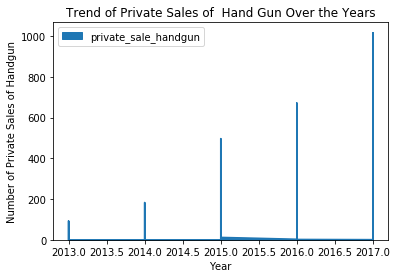

In [23]:
#Show the overall trend of private sales of hand gun over the years
#plt.figure(figsize=(15, 9))

chi[['year','private_sale_handgun']].plot.area(x='year')
plt.xlabel('Year')
plt.ylabel('Number of Private Sales of Handgun')
plt.title('Trend of Private Sales of  Hand Gun Over the Years')

> **The chart above shows that the trend of private sales handgun increases every year and the trend shows that there is upward trend in private sales of handgun are increasing between 2013 and 2017...**

### Research Question 4: What is the relationship between permit and prepawn handguns

Text(0.5,1,'Relationship Between Permit and Prepawn Hand Guns in the US')

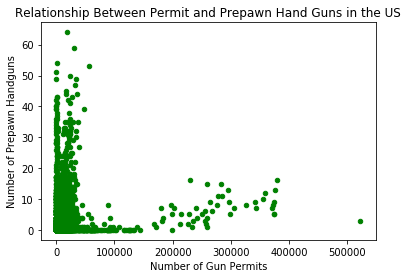

In [27]:
#plot the relationship between permit and prepawn handguns in the US using scatter plot
chi.plot.scatter(x='permit', y='prepawn_handgun', color='green')
plt.xlabel('Number of Gun Permits')
plt.ylabel('Number of Prepawn Handguns')
plt.title('Relationship Between Permit and Prepawn Hand Guns in the US')

>**From the graph, there seems to be no clear relationship between no of gun permits and prepawn handgun in the US. There is however a low number of gun permit appears to be associated with number of prepawn handgun**

# CONCLUSION
> _it is evident that Texas and Mississippi lead with highest average number of prepawn handgun while Ohio and Missouri bottow the bar char of those least two states with highest number of average prepawn handgun. Kentucky, California, Illinois, Indiana, and North Carolina are the top 5 states with highest number of gun permint in the US over the period of years covered. There is however a low number of gun permit appears to be associated with number of prepawn handgun The trend of hand gun sales has significantly risen from the year 2013 to 2017 with Kentuckey, Illinois and California being the top 3 highest._


## Limitation
> _The limitations encountered in this project is that only descriptive and exploratory analyses were carried out in this project, and no attempt was made to perform inferential statistics. It is equally noteworthy that in no part of this project analysis did we imply causation of any form, and any insights that seem like causation only look like it and is not intended..._  

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Resources Used

#https://realpython.com/pandas-groupby/
#https://stackoverflow.com/?newreg=88cf3e599c804c9eaecb18b810d344ce
